## **LOGISTIC REGRESSION**

Logistic regression is statistical model that in its basic from uses a logistic function to model a binary dependent variable, although many more complex extensions exit. In regression analysis, logistic regression (or logit regression) is estimating the paramaters of a logistic model (a form of binary regression). 

For example, spam dectection for emails, predicting if a customer will default in a loan, etc.

<img src = "https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png">

## **Geting Started with Logistic Regression**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

# **Data Framing**

Read .csv data into a DataFrame

In [2]:
data_df = pd.read_csv(r'F:\DataMining\dataset\titanic.csv')
data_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# **Exploring Dataset**

In [3]:
data_df = data_df[["pclass", "sex", "age", "survived"]]
data_df.shape

(1310, 4)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   sex       1309 non-null   object 
 2   age       1046 non-null   float64
 3   survived  1309 non-null   float64
dtypes: float64(3), object(1)
memory usage: 41.1+ KB


In [5]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percentage = missing_data/len(data_df) * 100
    print(f"{col} has {missing_percentage:.2f}% missing data")

pclass has 0.08% missing data
sex has 0.08% missing data
age has 20.15% missing data
survived has 0.08% missing data


# **Preprocessing: Dealing with Missing Values**

In [10]:
# Dropping Rows with Nan in all provided columns
data_df = data_df.dropna(subset=["sex", "pclass"])
#Again Finding number of Nan or missing values in all columns 
print(data_df.isna().sum(axis = 0))

pclass        0
sex           0
age         263
survived      0
dtype: int64


# **Preprocessing: Label Encoding**

Since in **sex** column we are not having a numerical value, just having male and female. Since, model does not accept text, which we will transform text into binary labels. 

In [11]:
data_df["sex"] = data_df["sex"].map({"female": 1, "male": 0})

In [12]:
data_df.head()

,pclass,sex,age,survived
0,1.0,1,29.0000,1.0
1,1.0,0,0.9167,1.0
2,1.0,1,2.0000,0.0
3,1.0,0,30.0000,0.0
4,1.0,1,25.0000,0.0


In [25]:
# Features extraction
feature = data_df.iloc[:,:-1]
target = data_df.iloc[:,-1]

# **Preprocessing: Imputation | Missing Values in Age**

In [26]:
from sklearn.impute import  SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy="mean")
feature = imputer.fit_transform(feature)

In [27]:
feature

array([[ 1.    ,  1.    , 29.    ],
       [ 1.    ,  0.    ,  0.9167],
       [ 1.    ,  1.    ,  2.    ],
       ...,
       [ 3.    ,  0.    , 26.5   ],
       [ 3.    ,  0.    , 27.    ],
       [ 3.    ,  0.    , 29.    ]], shape=(1309, 3))

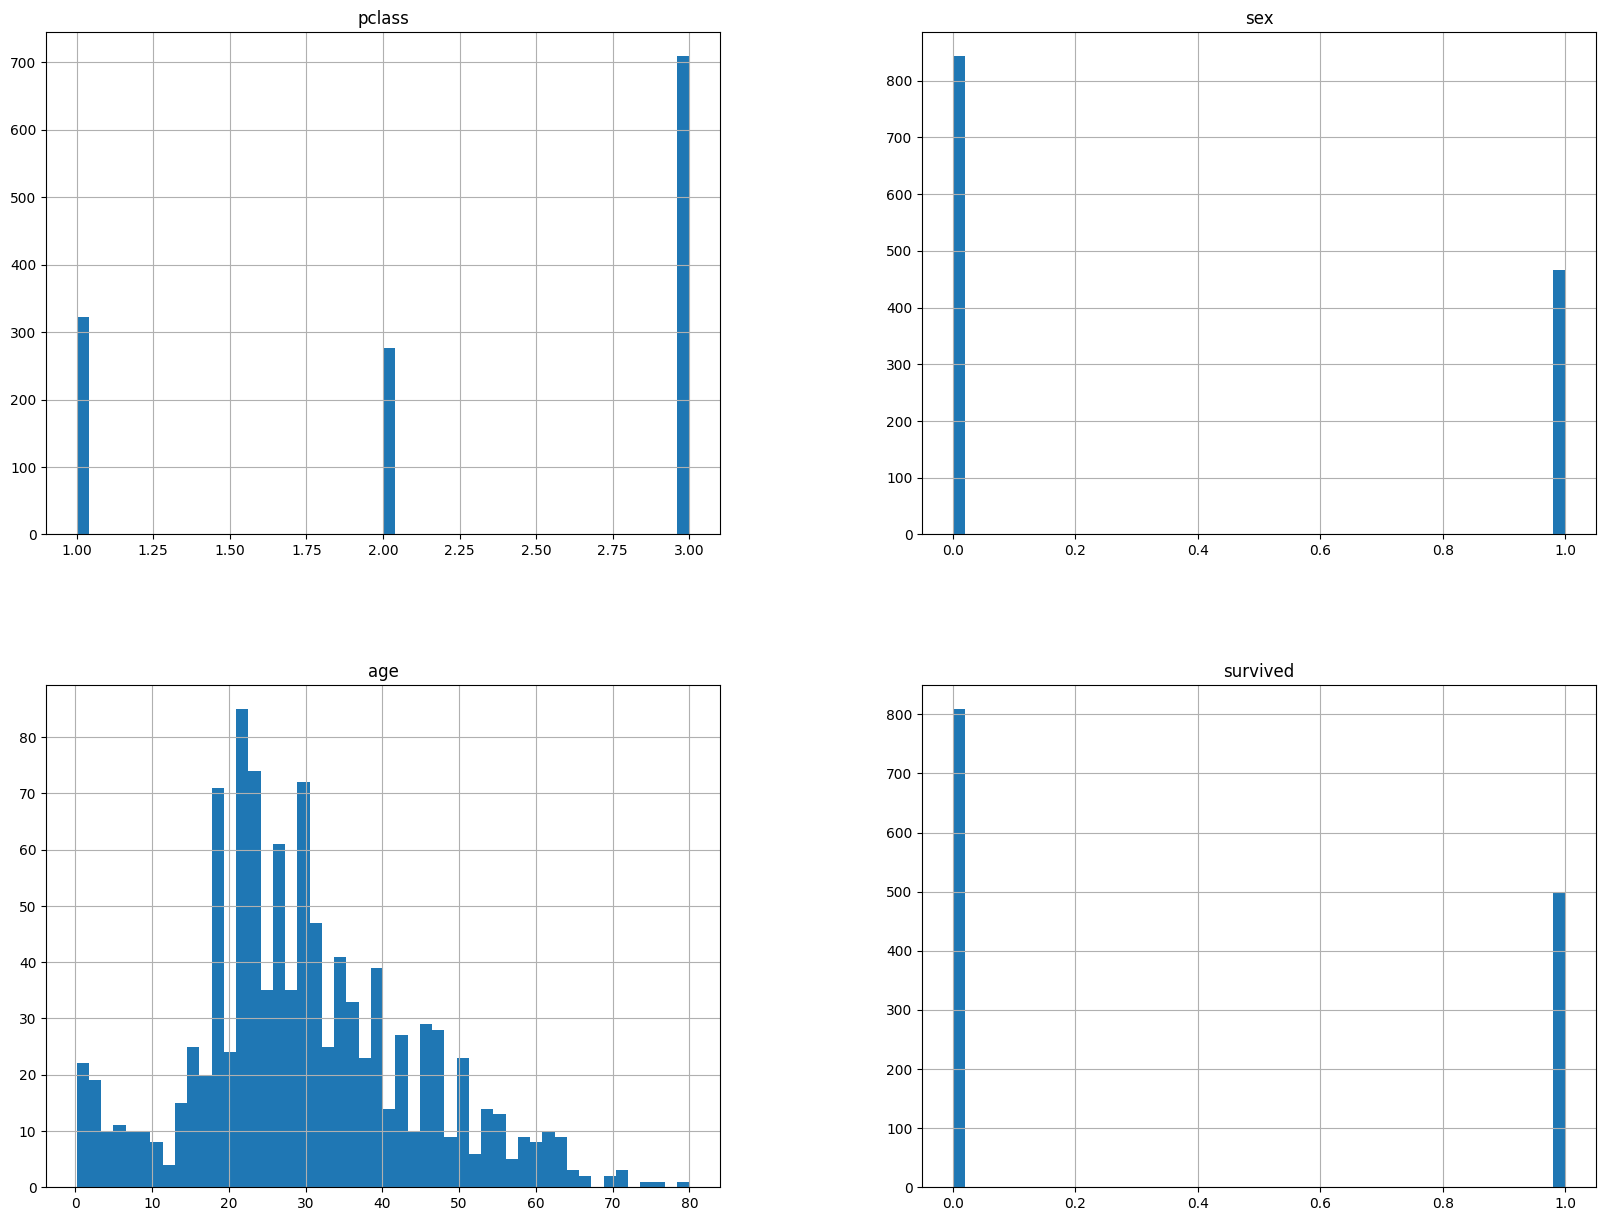

In [29]:
data_df.hist(bins=50, figsize=(20,15));

# **Splitting our dataset into Train and Test Set**

In [35]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)

# **Training the Model** 

We are using Logistic regression model as imported from sklearn library and then it's being trained on x_train and y_train

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

predictions = lr.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions)*100)

77.48091603053436


In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[128  16]
 [ 43  75]]


<img src ="https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816" height =200>